In [4]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [5]:
# Reading Dataset
# Dataset is from https://www.kaggle.com/amruthjithrajvr/recruitment-scam
data=pd.read_csv("./fake_job_postings.csv")

In [6]:
# Reading top 5 rows of our dataset
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
# To check the number of rows and column
data.shape

(17880, 18)

In [8]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [9]:
# let us check the missing values in our dataset

data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
# Let us remove the columns which are not necessary
# axis =1 specifies that the values are column value and inplace=true to make these changes permanent (ie. make these dropes of columns permanent in the data set)
# We have droped salary range because 70% approx null value
# also job_id and other irrelvent columns because they does not have any logical meaning
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [11]:
data.shape
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [12]:
# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
data.fillna(' ', inplace=True)

In [15]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["fraudulent"]]
# Store the variable we are predicting 
target = "fraudulent"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)
  
df3 = pd.DataFrame(y_res)
  
# the default behaviour is join='outer'
# inner join
  
result = pd.concat([df1, df3], axis=1, join='inner')
display(result)
data=result;

(17880, 12)
(17880,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
9199,Staff Interpreter (Part-time),"US, MN, Central/Southern Minnesota",Interpreting Services,"Why CSD?CSD is not only a great place to work,...",The Staff Interpreters provide sign language i...,High School Diploma or equivalentBachelor's de...,CSD offers a competitive benefits package for ...,Part-time,Mid-Senior level,High School or equivalent,Public Relations and Communications,Customer Service,0
3885,Graduates: English Teacher Abroad (Conversatio...,"US, PA, Slippery Rock",,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Contract,Entry level,Bachelor's Degree,Education Management,Education,0
10858,SENIOR .NET DEVELOPER,"PH, 07, Cebu City",Information Technology,Zylun is expanding the recruiting landscape fo...,Qualifications:5+ Years .NET/C# Development Ex...,,,Full-time,,Master's Degree,Staffing and Recruiting,Information Technology,0
14503,Senior Platform Engineer,"US, CA, Mountain View",,"Come be a part of one of the fastest growing, ...",As platform software engineer you will contrib...,Responsibilities… Own product features and del...,Competitive base salaryStock OptionsFull benef...,,,,,,0
12631,Digital Ad Operations Manager,"US, NY, 10010",,Sawyer Studios is a full service marketing and...,Full-service entertainment marketing and adver...,Passion for independent film and the future of...,Contract to Perm. After successful trial perio...,Full-time,Associate,Bachelor's Degree,Entertainment,Advertising,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,Student Positions Part-Time and Full-Time.You ...,,,Part-time,,,,,1
17828,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,,,,,,1
17829,Android Developer,"PL, MZ, Warsaw",,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,,,,,,1
17830,Payroll Clerk,"US, NY, New York",,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [16]:
data.isnull().sum()
# data cleaning done

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

# Explaratory Data Analysis

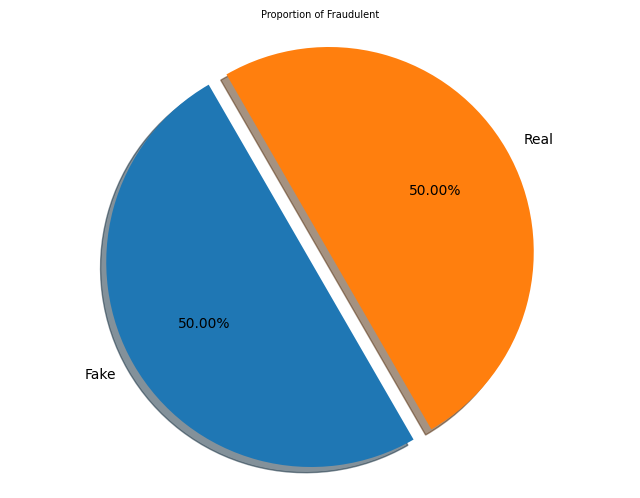

In [17]:
 # Checking for distribution of class label(percentages belonging to real class and percentages belonging to fraud class)
 # in the data 1 indicates fraud post
 # 0 indicating real post
 # Plotting pie chart for the data
 # function of Explode function: how the portion will appear (to understand change explode=(0,0.5))

labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show() 

In [18]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

9199     US
3885     US
10858    PH
14503    US
12631    US
         ..
17827    US
17828    AU
17829    PL
17830    US
17831    US
Name: country, Length: 1732, dtype: object

In [19]:
# this will give unique country values
data['country'].nunique()

51

In [20]:
# top 10 country that post jobs 
data['country'].value_counts()[:11]

country
US    1221
GB     151
        50
AU      46
GR      44
CA      34
IN      18
DE      18
NZ      16
MY      12
NL       8
Name: count, dtype: int64

Text(0.5, 0, 'Countries')

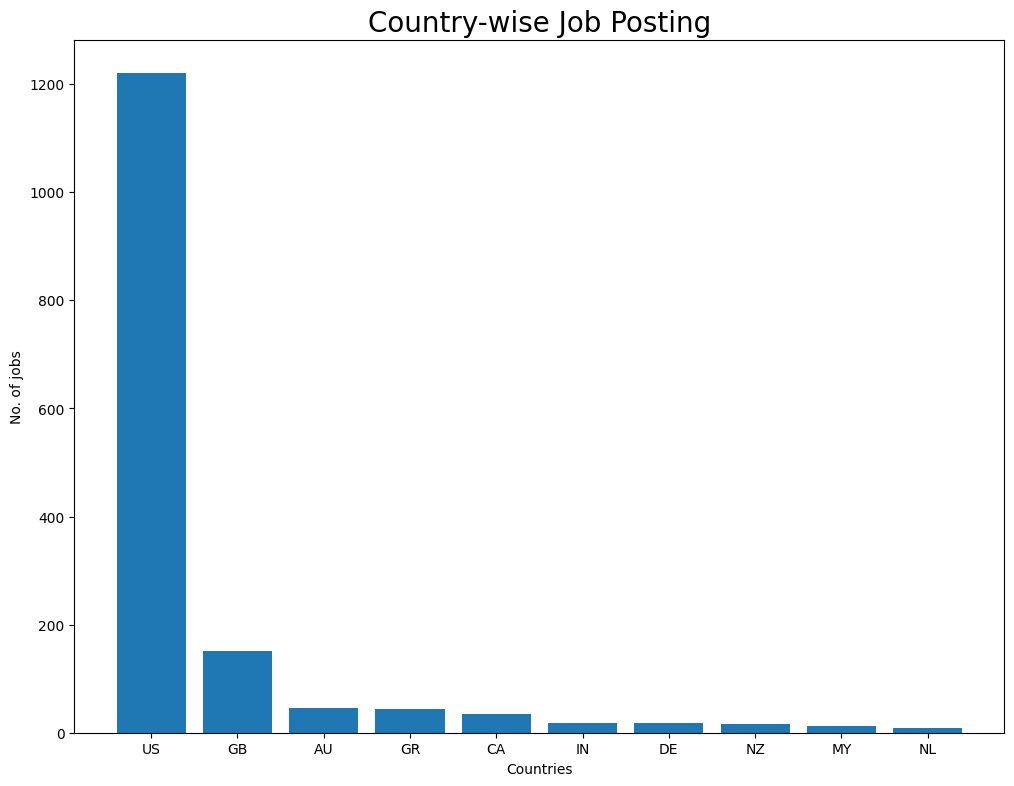

In [21]:
# creating a dictionary(key-value pair) with top 10 country
country = dict(data.country.value_counts()[:11])
del country[' '] #deleting country with space values
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [22]:
country.keys()

dict_keys(['US', 'GB', 'AU', 'GR', 'CA', 'IN', 'DE', 'NZ', 'MY', 'NL'])

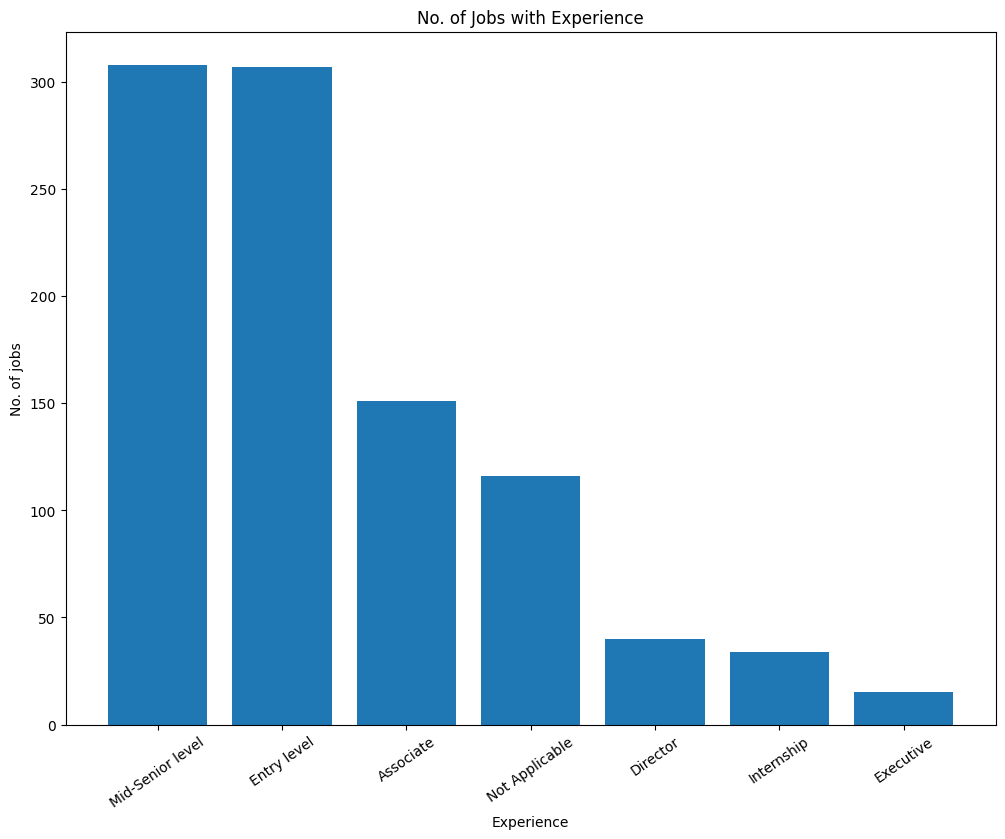

In [23]:
# visualizing jobs based on experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [24]:
# Task: This data is Inbalanced, it contains 95% of real jobs and only 5% fake jobs,but we can make it balance
# Try this out

In [25]:
#Most frequent jobs
print(data.title.value_counts()[:10])

title
Customer Service Representative                                         22
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Administrative Assistant                                                17
English Teacher Abroad                                                  17
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Graduates: English Teacher Abroad (Conversational)                      11
Account Sales Managers $80-$130,000/yr                                  10
Payroll Clerk                                                           10
Name: count, dtype: int64


In [26]:
#Titles and count of fraudulent jobs
# checking for most fake jobs based on title
print(data[data.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


In [27]:
# For textual type data we will try to create word cloud 
# but before that we will try to create text combining all the data present in
# our database.
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [28]:
data.head()

,fraudulent,text
9199,0,"Staff Interpreter (Part-time) US, MN, Central/..."
3885,0,Graduates: English Teacher Abroad (Conversatio...
10858,0,"SENIOR .NET DEVELOPER PH, 07, Cebu City Zylun ..."
14503,0,"Senior Platform Engineer US, CA, Mountain View..."
12631,0,"Digital Ad Operations Manager US, NY, 10010 Sa..."


**Understanding the common words used in the texts : Wordcloud**

In [30]:
# we will plot 3 kind of word cloud
# 1st we will visualize all the words our data using the wordcloud plot
# 2nd we will visualize common words in real job posting
# 3rd we will visualize common words in fraud job posting
# join function is a core python function
from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]]) 

In [32]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

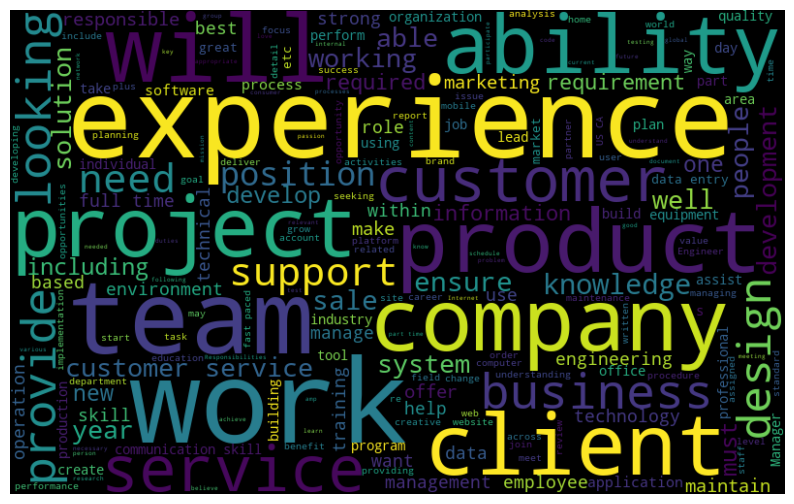

In [33]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
 # Common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)


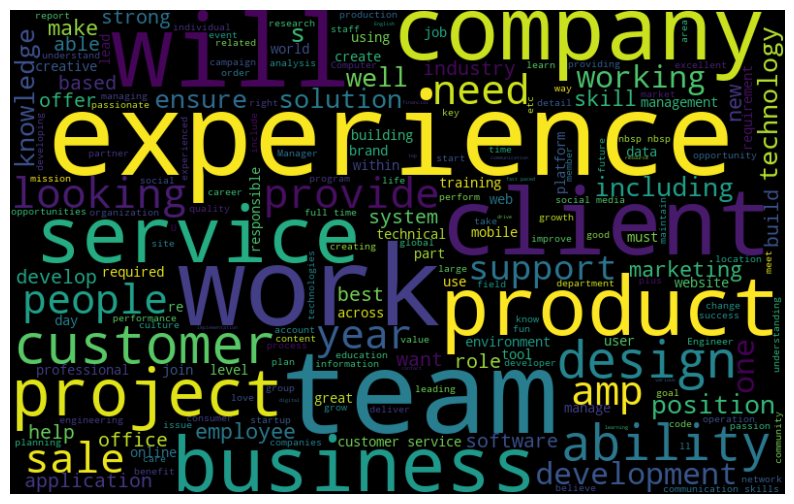

In [35]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
# Common words in fraud job posting texts

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])

In [37]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

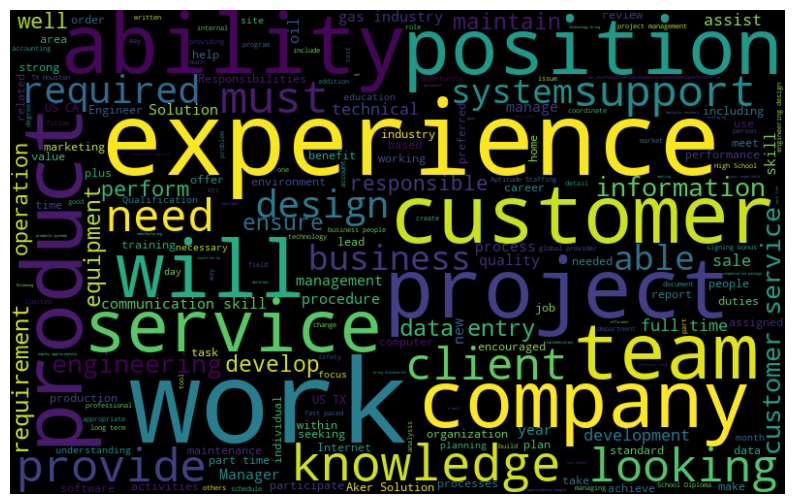

In [38]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data *Preapration*

In [42]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Revanth
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [50]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [52]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [53]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [56]:
from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [57]:
# what does X-train and y_train contain
print(y_train)
print(X_train)


2041     1
8309     1
4480     0
4357     1
17585    1
        ..
2839     0
13428    0
8783     0
13432    0
8816     0
Name: fraudulent, Length: 1212, dtype: int64
2041     head machining department us, tx, houston aker...
8309     software architect us, , san jose netgear apti...
4480     lead consultant -obiee us, ca, san jose, sfo, ...
4357     subsea process plant layout designer us, tx, h...
17585    success knocking... us, ga, atlanta ...we look...
                               ...                        
2839     vendor relations associate us, ny, ronkonkoma ...
13428    mobile applications engineer gr, i, athens thr...
8783     marketing manager gb, lnd, london e-car club e...
13432    desktop technician (imaging) us, ga, atlanta l...
8816     desktop support technician us, tx, college sta...
Name: text, Length: 1212, dtype: object


In [58]:
# The model cannot operate text data so we need to convert our data into vector format
# we will be using Bag of words model 
from sklearn.feature_extraction.text import CountVectorizer

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)


In [59]:
# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

  (0, 1)	2
  (0, 32)	1
  (0, 244)	2
  (0, 261)	2
  (0, 385)	1
  (0, 403)	1
  (0, 522)	2
  (0, 556)	1
  (0, 627)	1
  (0, 712)	1
  (0, 720)	1
  (0, 802)	1
  (0, 1045)	1
  (0, 1104)	1
  (0, 1112)	2
  (0, 1163)	1
  (0, 1186)	1
  (0, 1208)	1
  (0, 1453)	1
  (0, 1471)	2
  (0, 1517)	2
  (0, 1521)	1
  (0, 1556)	1
  (0, 1594)	1
  (0, 1647)	1
  :	:
  (1211, 18977)	1
  (1211, 18986)	1
  (1211, 18998)	1
  (1211, 19046)	1
  (1211, 19054)	1
  (1211, 19072)	4
  (1211, 19185)	1
  (1211, 19245)	1
  (1211, 19374)	1
  (1211, 19380)	6
  (1211, 19444)	2
  (1211, 19503)	3
  (1211, 19550)	1
  (1211, 19582)	2
  (1211, 19600)	1
  (1211, 19608)	1
  (1211, 19657)	3
  (1211, 19660)	1
  (1211, 19687)	9
  (1211, 19716)	3
  (1211, 19754)	1
  (1211, 19809)	1
  (1211, 19874)	1
  (1211, 19888)	1
  (1211, 19904)	2


In [60]:
# PCA is not advisable for a NLP task,because PCA is for 
# principal feature extraction and in this case we already have features

In [61]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<520x20035 sparse matrix of type '<class 'numpy.int64'>'
	with 78779 stored elements in Compressed Sparse Row format>

# Model Building & evaluation

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

<h2>Naive Bayes</h2>

In [65]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
# generally if there are data in the form of this long text,it is advisable to 
# %time will give the time taken by the system for execution
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 5.62 ms


MultinomialNB()

In [66]:
y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)

[0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0
 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1
 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0
 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0
 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 1 0 1 1 1 

Classification Accuracy: 0.9019230769230769
Classification Report

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       259
           1       0.92      0.88      0.90       261

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520

Confusion Matrix

[[239  20]
 [ 31 230]]


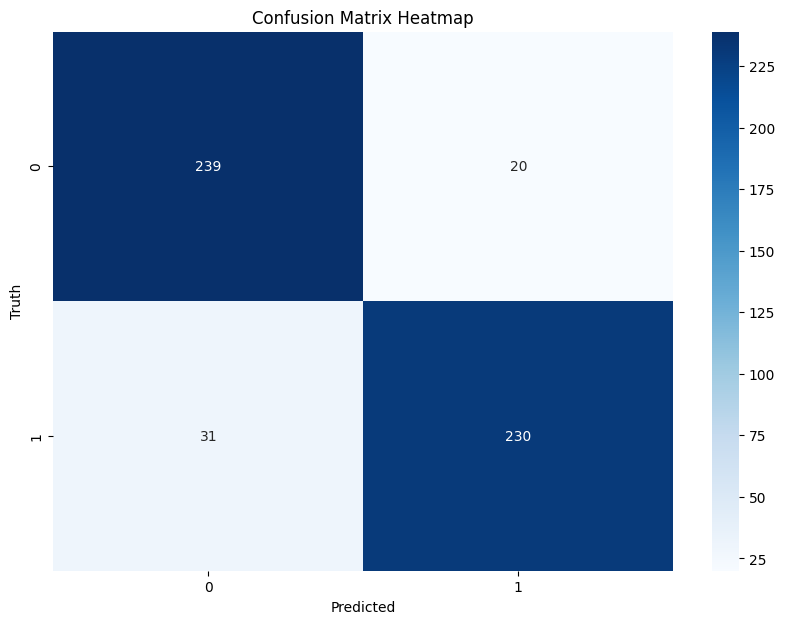

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
# Assuming y_test and y_pred_nb are already defined

# Print accuracy score
print("Classification Accuracy:", accuracy_score(y_test, y_pred_nb))

# Print classification report
print("Classification Report\n")
print(classification_report(y_test, y_pred_nb))

# Print confusion matrix
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))

# Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # fmt='d' ensures integer formatting
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix Heatmap')
plt.show()

<h2>Decision Tree Classifier</h2>

In [70]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

In [71]:
#train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: total: 109 ms
Wall time: 475 ms


DecisionTreeClassifier()

In [72]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

In [73]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))



Classification Accuracy: 0.8307692307692308
Classification Report

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       259
           1       0.81      0.87      0.84       261

    accuracy                           0.83       520
   macro avg       0.83      0.83      0.83       520
weighted avg       0.83      0.83      0.83       520

Confusion Matrix

[[204  55]
 [ 33 228]]


Text(95.72222222222221, 0.5, 'Truth')

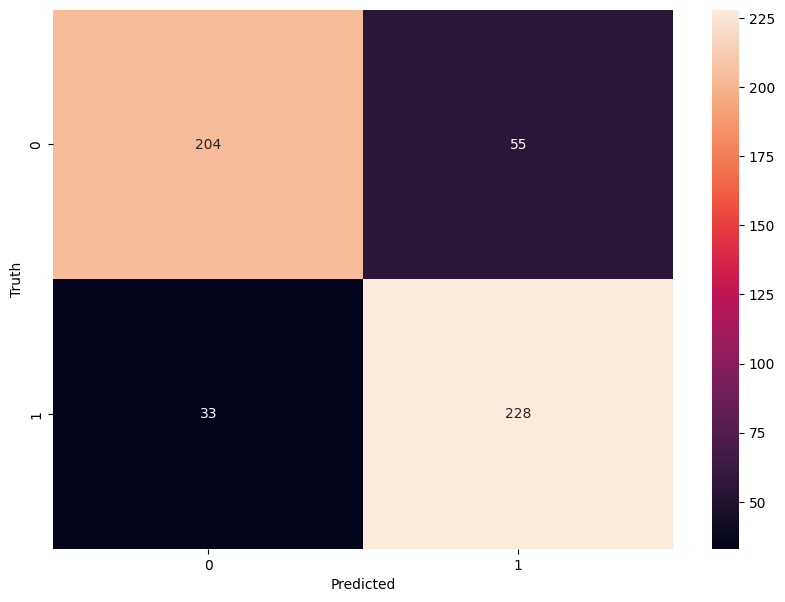

In [96]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Building a Predictive System

In [75]:
#Lets Predict for a data set
X_test

8792     operations planning associate sg, , shape futu...
4402     sales representative us, nc, greensboro gary c...
12064    application developer us, mn, minneapolis prov...
11766    customer success district manager us, mo, st. ...
1798     clinincal sleep studies technician us, ga, atl...
                               ...                        
8184     web developer gr, i, athens looking creative, ...
17775    administrative clerk us, , processing letters,...
7802     cognos developer us, wa, seattle must 5+ years...
4673     caregiver- saint joseph/benton harbor us, mi, ...
11862    quality assurance engineer us, ca, santa monic...
Name: text, Length: 520, dtype: object

In [91]:
print(X_test.iloc[519])

quality assurance engineer us, ca, santa monica we’re always looking highly motivated “founder-types” join us grow. here’s need know.our core values:every member team brings something unique table, share values:use intelligence without arrogancetake initiative, execute tenaciouslyput team’s needs ownrespect customers, partners, investors, co-workersfocus results, never compromise qualitylive learn, share discoverbe honest, transparent, goodnever, ever give up!things consider:1. hiring entrepreneurial positions, entrepreneurial company. means you’ll need resourceful creative, also following processes allow us scale quickly.2. hire culture greatness. looking well-rounded people willing commit wholeheartedly cause next couple years grow alongside company.3. massive opportunity right person. startup life rollercoaster, led team experienced entrepreneurs built sold multiple companies. opportunity upward mobility mobile majority tremendous, you’re willing put forth effort.culture benefits:it

In [92]:
input_text=["customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping &amp; receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software"]

In [94]:
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[0]
Real Job


In [95]:
print(y_test.iloc[519])  


0


Thus the predicted result was correct.